## **Setup Interpreter**

Some test code that shows how to use **mllibs**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mllibs.nlpm import nlpm
from mllibs.nlpi import nlpi
from mllibs.eda.meda_scplot import eda_scplot
from mllibs.eda.meda_splot import eda_splot
from mllibs.stats.mstats_tests import stats_tests
from mllibs.stats.mstats_plot import stats_plot
from mllibs.stats.mstats_general import stats_general
from mllibs.libop.mlibop import libop_general
from mllibs.pd.mpd_dfop import pd_dfop
from mllibs.signal.mfourier_all import fourier_all

# nlpi.activate = False
c = nlpm()
# c.reset_models()
c.load([
	eda_splot(),     # [eda] standard seaborn plots
	eda_scplot(),    # [eda] seaborn column plots
	stats_tests(),   # [stats] statistical tests for list data
	stats_general(), # [stats] 
	stats_plot(),    # [stats] visually compare sample distributions
	libop_general(), # [library] mllibs related functionality
	pd_dfop(),       # [eda] pandas data exploration 
	fourier_all()    # [signal] fast fourier transformation related
	])

c.setup()
i = nlpi(c)
i.load_sample_data()
i.data.keys()


[note] initialising nlpm, please load modules using .load(list)
[note] loading modules ...
[note] making module summary labels...
[note] training  [gt_model] [accuracy,1.0]
[note] models trained!


dict_keys(['flights', 'penguins', 'taxis', 'titanic', 'dmpg'])

In [2]:
# i.sources()

[note] setting module_args parameters
{'x': 'pickup_borough', 'y': 'fare', 'hue': 'payment'}
[note] found relevant global task [sviolinplot] w/ [0.41] certainty!


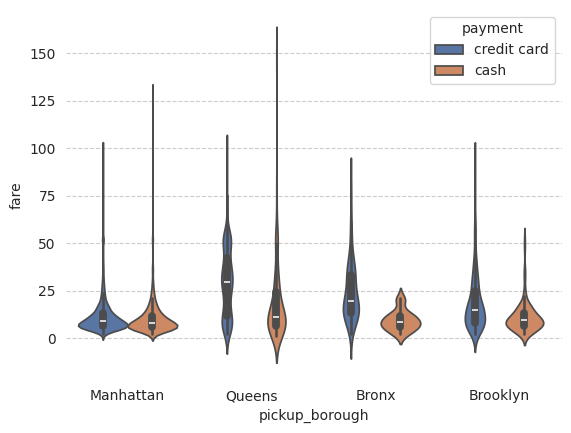

In [3]:
i['visualise the seaborn violin plots for data taxis using x pickup_borough and y fare set hue to payment']

In [7]:
i['show the columns statistics for pickup_borough in taxis']

[note] found relevant global task [gstat_stats] w/ [0.53] certainty!
[note] found sub_task [dataframe_subset] w/ [1.0] certainty!


,pickup_borough
count,6407
unique,4
top,Manhattan
freq,5268


In [2]:
# '''

#     Example for mstats_tests module

# '''

# # store data
# sample1 = list(np.random.normal(scale=1, size=1000))
# sample2 = list(np.random.rand(500))
# sample3 = list(np.random.exponential(scale=1, size=1000))
# sample4 = list(np.random.normal(scale=1, size=1000))
# sample5 = list(np.random.normal(scale=1, size=1000))
# df = pd.DataFrame({'distA':sample1,'distC':sample3,'distD':sample5})

# nlpi.store_data(df,'datas')
# nlpi.store_data({'distrA':sample1,'distrB':sample2})
# nlpi.store_data(sample3,'distrC')

# store active columns
i.store_ac('penguins','selected_columns',['bill_length_mm','bill_depth_mm'])

In [ ]:
# i.module.corpus_subset
# i.module.corpus_gt

In [2]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# # from sklearn.preprocessing import StandardScaler, MaxAbsScaler
# from sklearn.pipeline import Pipeline
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import classification_report

# def create_corpus_sub_model(X,y):

#     '''
	
#     data : dict {'label':[corpus]} format 
	
#     '''

#     # Create a pipeline with CountVectorizer and RandomForestClassifier
#     pipeline = Pipeline([
#         ('vect', CountVectorizer(tokenizer=lambda x: x.split(),ngram_range=(1,1),stop_words=['a','the'],vocabulary=['~x','~y','-column','~hue','~col','~row','and'])),
#         ('clf', GradientBoostingClassifier())
#     ])

#     # Fit the pipeline on the training data
#     pipeline.fit(X,y)
#     y_pred = pipeline.predict(X)

#     # Print classification report
#     print(classification_report(y, y_pred))
#     return pipeline

# ls = i.module.corpus_subset['srelplot']
# X,y = ls['text'],ls['label']

# pipeline_ml = create_corpus_sub_model(X,y)
# pp = pipeline_ml.predict_proba(['using data -df create a seaborn relplot using columns -column and -column setting ~hue -column'])
# pd.DataFrame({'classes':list(pipeline_ml.classes_),'pp':list(pp[0])}).sort_values(by='pp',ascending=False)
# # print(pp); print(pp.argmax())
# # print(pipeline_ml.classes_)
# # pipeline_ml.classes_[pp.argmax()]


In [3]:
# i.module.gt_stats

In [3]:
# mapper = {index: value for index, value in enumerate(i.module.label['gt'])}
# i.module.gt_stats['classes'].map(mapper)

In [2]:
# pd.DataFrame({'vocab':list(pipeline_ml['vect'].vocabulary_),
#               'idf':list(pipeline_ml['vect'].idf_)}).sort_values(by='idf',ascending=False)


# word_list = list(pipeline_ml['vect'].vocabulary_.keys())
# counts = list(pipeline_ml['vect'].fit_transform(ls['text']).toarray().sum(axis=0))
# pd.DataFrame({'vocab':word_list,'counts':counts})


In [3]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

		# self.tdata = data
tfidf_vectorizer = i.module.tfidf
dict_vectorizer = i.module.dictv


		# self.tdata = data
		# self.tfidf = tfidf_vectorizer
		# self.dictv = dict_vectorizer
		# self.vlabels = labels
        
def merger(X1,X2):

    # convert to non-sparse 
    X_vect1 = pd.DataFrame(np.asarray(X1.todense()))
    X_vect2 = pd.DataFrame(np.asarray(X2.todense()))
    data = pd.concat([X_vect1,X_vect2],axis=1)
    # data.fillna(0.0,inplace=True)
    data = data.values # convert to numpy

    return data


model = RandomForestClassifier()
# model = CatBoostClassifier(silent=True)
model.fit(i.module.tdata,i.module.vlabels)


# model.fit(i.module.tdata,i.module.vlabels)


RandomForestClassifier()

In [6]:
from mllibs.nerparser import Parser,ner_model, tfidf, dicttransformer, merger
import itertools

tokens = i.tokens
X_vect1,_ = tfidf(tokens,tfidf_vectorizer)
X_vect2,_ = dicttransformer(tokens,dict_vectorizer)

print(X_vect1.shape)
print(X_vect2.shape)

X_all = merger(X_vect1,X_vect2)
print('X_all')
print(X_all.shape)

# # predict
y_pred = model.predict(X_all)
print(y_pred)
		

(21, 177)
(21, 920)
X_all
(21, 1097)
['O' 'I-TOKEN_REMOVE' 'O' 'O' 'O' 'O' 'O' 'O' 'B-TOKEN_REMOVE' 'B-PARAM'
 'O' 'O' 'B-PARAM' 'O' 'B-PARAM' 'O' 'B-PARAM' 'O' 'O' 'B-PARAM' 'O']


## **meda_splot**

Module that uses `seaborn` to plot figures

[note] setting module_args parameters
{'x': 'bill_length_mm', 'y': 'bill_depth_mm', 'mew': 1, 'mec': 'k', 'hue': 'island'}
[note] found relevant global task [sscatterplot] w/ [0.27] certainty!
[note] found sub_task [param_defined] w/ [1.0] certainty!


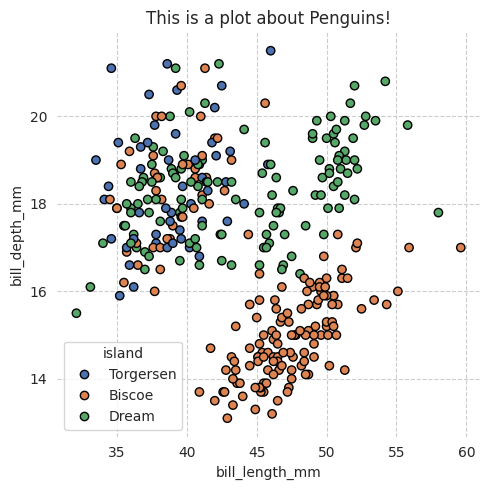

In [5]:

# nlpi.silent = False
nlpi.pp['figsize'] = (5,5)
nlpi.pp['title'] = 'This is a plot about Penguins!'
i['use data penguins and create a seaborn scatterplot using x bill_length_mm and y bill_depth_mm mew 1 mec k set hue to island']
# i['using data penguins create relplot using x bill_length_mm and y bill_depth_mm for different sex setting hue to island mew 1 mec k']

In [3]:
nlpi.pp

{'title': None,
 'template': None,
 'background': None,
 'figsize': None,
 'stheme': None,
 'fill': True,
 'legend': True,
 'bw': 1}

[note] setting module_args parameters
{'x': 'pickup_borough', 'y': 'fare', 'hue': 'payment'}
[note] found relevant global task [sboxplot] w/ [0.36] certainty!


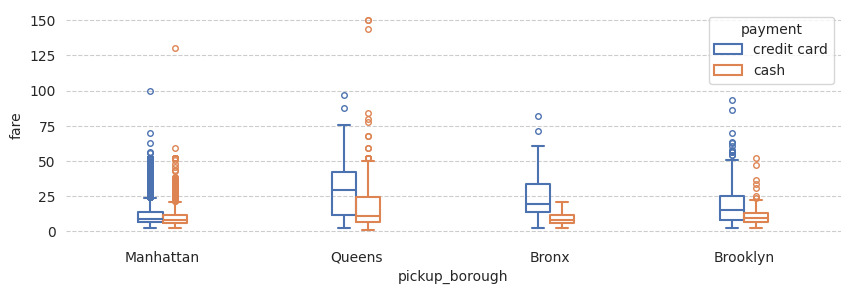

In [3]:
'''

    Seaborn Boxplot

'''

nlpi.pp['figsize'] = (10,3)
nlpi.pp['width'] = 0.25
nlpi.pp['s'] = 4
nlpi.pp['fill'] = False
i['plot the boxplot relation for data taxis using x pickup_borough and y as fare set hue to payment']

[note] setting module_args parameters
{'x': 'pickup_borough', 'y': 'tip'}
[note] found relevant global task [sviolinplot] w/ [0.65] certainty!


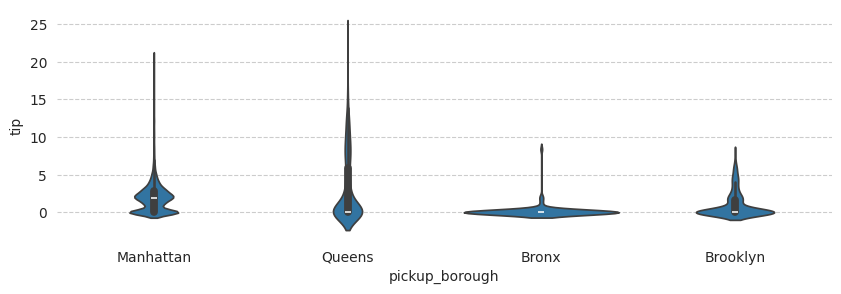

In [3]:
'''

    Seaborn Violinplot

''' 

nlpi.pp['figsize'] = (10,3)
i['create a seaborn violin plot using taxis setting x pickup_borough and y tip']

In [4]:
i.module_args

{'pred_task': 'shistplot',
 'data': {'list': [], 'df': ['taxis']},
 'data_name': {'taxis': 'df'},
 'subset': None,
 'sub_task': None,
 'features': None,
 'target': None,
 'dtype_req': ['pd.DataFrame'],
 'store_as': None,
 'column': None,
 'alpha': None,
 'nbins': None,
 'x': None,
 'nsamples': None,
 'col': None,
 'col_wrap': None,
 'hue': None,
 'dtype': None,
 'mec': None,
 'popmean': None,
 's': None,
 'barmode': None,
 'row': None,
 'columns': None,
 'mew': None,
 'y': None,
 'request': 'create a seaborn histplot using -df set ~x tips',
 'task_info': module                                                   eda_plot
 sample          make a seaborn histogram using ~x -column and ...
 topic                                   exploratory data analysis
 subtopic                                              plot figure
 action                                                  show plot
 input_format                                         pd.DataFrame
 output                               

In [4]:
nlpi.pp

{'title': None,
 'template': None,
 'background': None,
 'figsize': (10, 3),
 'stheme': None,
 'fill': True,
 'legend': True,
 'bw': 1,
 'xrange': [0, 10]}

[note] setting module_args parameters
{'x': 'tip', 'hue': 'pickup_borough'}
[note] found relevant global task [shistplot] w/ [0.39] certainty!


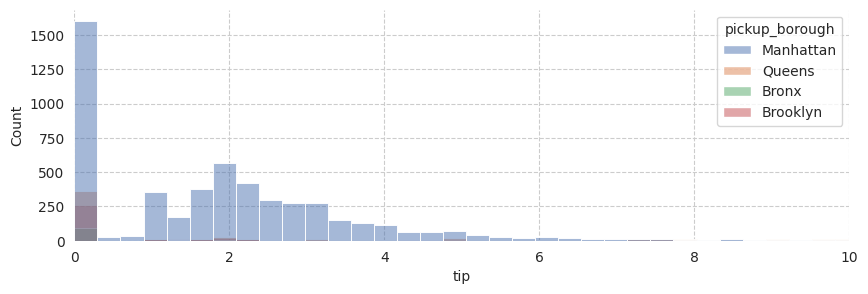

In [2]:
nlpi.pp['figsize'] = (10,3)
nlpi.pp['xrange'] = [0,10]

i['create a seaborn histplot using taxis set x tip hue pickup_borough']

In [5]:
nlpi.pp['yrange']

KeyError: 'yrange'

[note] setting module_args parameters
{'x': 'bill_length_mm', 'y': 'bill_depth_mm', 'mew': 1, 'mec': 'k'}
[note] found relevant global task [srelplot] w/ [0.87] certainty!
[note] found sub_task [param_defined_col] w/ [1.0] certainty!


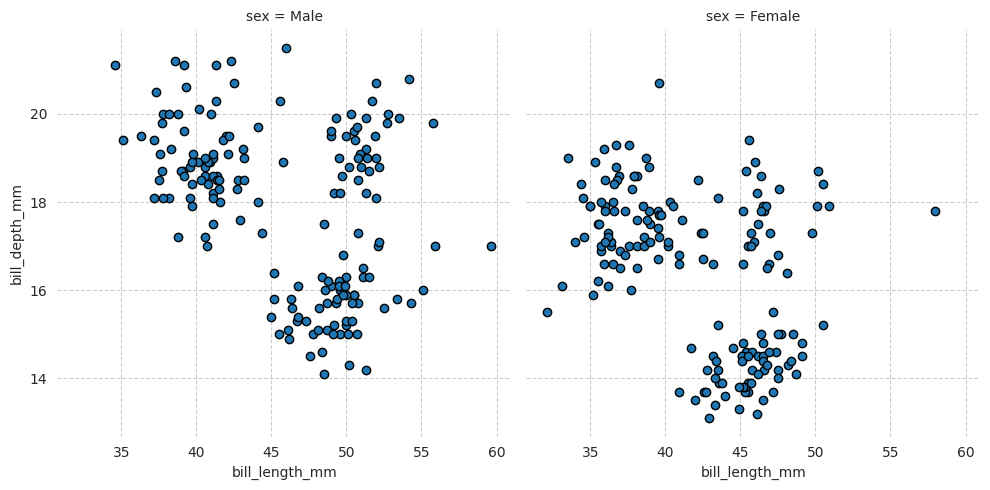

In [6]:
i['for all sex using data penguins create a seaborn relplot using columns x bill_length_mm and y bill_depth_mm set mew 1 and mec k']


##################################################################

[note] extracting parameters from input request!

[note] input request:
using data penguins create a seaborn scatterplot using x
bill_length_mm and y bill_depth_mm set hue island

[note] data sources have been found
{'list': [], 'df': ['penguins']}
[note] setting module_args parameters
{'x': 'bill_length_mm', 'y': 'bill_depth_mm', 'hue': 'island'}

[note] filtered request:
using data -df create a seaborn scatterplot using ~x -column ~y -column ~hue -column

##################################################################

[note] found relevant global task [sscatterplot] w/ [0.49] certainty!
[note] found sub_task [param_defined] w/ [1.0] certainty!

[note] module function info
make a scatter plot using seaborn, bivariate or multivariate



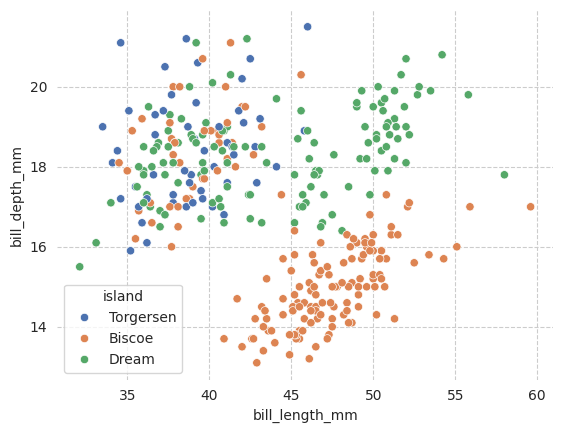

In [4]:
nlpi.silent = False
i['using data penguins create a seaborn scatterplot using x bill_length_mm and y bill_depth_mm set hue as island']
# i['please create a seaborn scatter plot using ~x -column and ~y -column']

# i['what data is available to me']
# i.setpp({'figsize':[500,900],'template':'plotly_white','title':None})
# nlpi.silent = False



In [28]:
from sklearn.base import clone
from nltk.tokenize import word_tokenize, WhitespaceTokenizer 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

def nltk_wtokeniser(text):
    return WhitespaceTokenizer().tokenize(text)

def mlloop(corpus:pd.DataFrame,module_name:str):

    # Convert text to numeric representation         
    # vect = TfidfVectorizer(tokenizer=lambda x: nltk_wtokeniser(x))  
    # vect = TfidfVectorizer(tokenizer=lambda x: nltk_wtokeniser(x),stop_words=['all','a','as','and']) 
    vect = CountVectorizer(tokenizer=lambda x: nltk_wtokeniser(x),stop_words=['all','a','as','and'])  
    vect.fit(corpus['text']) # input into vectoriser is a series
    vectors = vect.transform(corpus['text']) # sparse matrix
    # vectoriser[module_name] = vect  # store vectoriser 

    # vocabulary of TFIDF
    lvocab = list(vect.vocabulary_.keys())
    lvocab.sort()
    # vocabulary[module_name] = lvocab
    
    X = vectors
    y = corpus['class'].values.astype('int')

    model_rf = RandomForestClassifier()
    model = clone(model_rf)
    model.fit(X,y)
    # model[module_name] = model # store model
    score = model.score(X,y)
    print(f"[note] training  [{module_name}] [{model}] [accuracy,{round(score,3)}]")

    return model

model = mlloop(i.module.corpus_gt,'gt')



	def pred_gtask(self,text:str):
		self.task_name,_ = self.module.predict_gtask('gt',text)
		# having [task_name] find its module
		self.module_name = self.find_module(self.task_name) 



In [29]:
model = mlloop(i.module.corpus_gt,'gt')

[note] training  [gt] [RandomForestClassifier()] [accuracy,1.0]


In [ ]:
model.predict 

In [18]:
i.module.corpus_gt

,task,text,class
0,sscatterplot,please create a seaborn scatter plot using ~x ...,0
1,sscatterplot,make a seaborn scatterplot using ~x -column an...,0
2,sscatterplot,create a seaborn scatter plot using ~x -column...,0
3,sscatterplot,create a seaborn scatter plot to visualise the...,0
4,sscatterplot,make a seaborn scatterplot to visualise the re...,0
...,...,...,...
530,jarque_bera_normal,jarque bera normal distribution test using -list,48
531,jarque_bera_normal,for -list test for normal distribution using j...,48
532,jarque_bera_normal,jarque bera test using -list,48
533,jarque_bera_normal,jarque bera test of normal distribution for -list,48


In [ ]:
i.store_ac('penguins','selected_columns',['bill_length_mm','bill_depth_mm'])
i.sources()

## **mlibop**

Module used for finding out various information about the library and current statuses

In [ ]:
i['show me all the data available to me']

In [ ]:
i['what are all the activation functions available to me']

## **mpd_dfop**

Module for doing various basic operations using a dataframe as the data source

### using entire dataframe

In [6]:
i['show the column names in the dataframe titanic']

[note] found relevant global task [dfcolumninfo] w/ [0.62] certainty!
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [5]:
i['show the shape of the dataframe titanic']

[note] found relevant global task [dfsize] w/ [0.53] certainty!
(891, 15)


In [4]:
i['show the statistics of dataframe datas']

[note] found relevant global task [gstat_stats] w/ [0.7] certainty!
[note] found sub_task [dataframe_inputs] w/ [0.89] certainty!
[note] no data sources found for gstat_stats
[note] no iteration activated!


In [ ]:
i['show the dataframe information for titanic']

In [ ]:
i['show the correlation of columns in the dataframe titanic']

In [ ]:
i['show the missing data in the dataframe titanic']

In [ ]:
i['show the column distributions for the dataframe titanic']

In [ ]:
i['show all the unique values in all columns in dataframe titanic']

In [ ]:
i['show the data types of the dataframe titanic']

### using a subset of dataframe

In [ ]:
i['show the column distributions for the dataframe titanic for the column class']

In [ ]:
i['show all the unique values of columns class and deck in dataframe titanic']

In [ ]:
i['show the unique values in column class in the dataframe titanic']

### **mstats_tests**

Module for conducting different statistical tests using lists as data input

In [ ]:
# independent student ttest (can be different sizes)
i['compare the means of two lists distrA distrB using indepentent student ttest']

In [ ]:
# dependent student ttest (must be same list size)
i['compare the means of two lists distrA and distrB using dependent students ttest']

In [ ]:
# one sample ttest, compare to population mean
i['do a single sample ttest of data distrA and set popmean 0.04']

In [ ]:
# Mann Whitney U-Test
i['mann whitney utest for dataset distrB and distrA']

In [ ]:
# Kolmogorov Smirnov Test for normality 
i['ks test for normality using dataset distrA']

In [ ]:
# Kolmogorov Smirnov test for uniformity
i['please check the dataset distrB for uniformity using the ks test']

In [ ]:
# Kolmogorov Smirnov test for exponentiality
i['using the ks test check the dataset distrC if it is of exponential nature']

In [ ]:
# Lilliefors test for normality
i['using the lilliefors statistical test check distrA for normality']

In [ ]:
# One way ANOVA test 
i['one way anova test to check if there is any difference between distrA distrB distrC']

In [ ]:
# Chi2 
i['chi2 statistical test for distrA and distrC']

### **mstats_plot**

Module for comparing visually the distribution of different subsets

In [ ]:
# plot the histogram distribution for different lists
i["compare the histograms of two samples distrB, distrC and distrA set nbins 100"] # dp_hist

In [ ]:
i["compare the distribution of two datasets distrA distrB and distrC using a kernel density plot"]

In [ ]:
i['compare the boxplot distribution for datasets distrA distrB and distrC']

In [ ]:
i['please plot the cumulative distribution functions for data distrA and distrB']

### **mstats_general**

In [ ]:
i['show the general statistics for distrA distrB and distC']

In [ ]:

# i.store_ac('penguins','selected_columns',['bill_length_mm','bill_depth_mm'])

# ldata = nlpi.data['iris']['data']
# train,test = train_test_split(ldata)
# interpreter.store_data({'train':train,'test':test})

# breast cancer data
cols = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
	   'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
	   'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
	   'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
	   'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
	   'fractal_dimension_se', 'radius_worst', 'texture_worst',
	   'perimeter_worst', 'area_worst', 'smoothness_worst',
	   'compactness_worst', 'concavity_worst', 'concave points_worst',
	   'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

df = pd.read_csv("https://raw.githubusercontent.com/akshaybahadur21/BreastCancer_Classification/master/breast_cancer/cancer_data.csv",
				 names = cols)
i.store_data({'breast_data':df})

# # customer review data
# df = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/customer_reviews.csv',sep=',')
# i.store_data({'reviews_data':df})

# # customer funds data
# df = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/funds_data.csv',delimiter=';')
# i.store_data({'customerfunds_data':df})

# df = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/stocks.csv',delimiter=',')
# i.store_data({'stocks':df})
# i.store_ac('penguins','selected_columns',['bill_length_mm','bill_depth_mm'])

# df = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/iris.csv',delimiter=',')
# i.store_data({'iris_data':df})

In [ ]:
aa = pd.DataFrame({'a':[1,2,3,4],'b':[2,3,4,5]})
if(aa is not None):
	print(aa)

In [ ]:
print(i.module_args['data'])
print(i.module_args['hue'])
print(i.module_args['column'])

### **meda_splot**

#### **srelplot**

In [ ]:
i.module_args['data']

In [ ]:
i.module_args['column']

In [ ]:
i.module_args['column']

In [ ]:
i["create a seaborn relplot to visualise the relationship between bill_depth_mm and bill_length_mm using penguins"]
# i['create a seaborn relplot to visualise the relationship between bill_depth_mm and bill_length_mm for each island using penguins']

In [ ]:
i.module_args['column']

In [ ]:
'''

	Specify columns names for x and y 

'''

i['using data penguins create a relplot using columns bill_length_mm and bill_depth_mm also set hue as island']

In [ ]:
'''

	Specify columns names for x and y ( + utilise active column name )

'''

i.store_ac('penguins','selected_columns',['bill_length_mm','bill_depth_mm'])
i['using data penguins create a relplot using columns selected_columns set hue as island']

In [ ]:
i.module_args['column']

In [ ]:
# i['show a dataset preview for data iris']
# i['what columns are available in data penguins']
# i['show me all the available data names']
# i['using data penguins create a relplot using columns bill_length_mm and flipper_length_mm']
i['using data penguins create a relplot using columns selected_columns set hue as island']

# i['what data is available to me']
# i.setpp({'figsize':[500,900],'template':'plotly_white','title':None})
# nlpi.silent = False

# i.store_ac('iris','ac_column',['petal_length','petal_width'])
# i.store_ac('iris','ac_column2',['petal_length','petal_width'])
# i['create a plotly scatterplot using x sepal_length and y petal_length petal_width using iris set s 7 col species']
# i['create a plotly scatterplot using x sepal_length and y ac_column using iris set s 7 col species']
# i['create a plotly scatterplot using iris and columns x petal_length y petal_width sepal_length set s 7']
# i['create a plotly scatterplot using iris for petal_length and petal_width for all species set s 7']
# i['create a plotly scatterplot using iris for petal_length and petal_width for all species and sex set s 7']
# i['create a plotly scatterplot using penguins plotting the relation between bill_length_mm and bill_depth_mm set s 6 mew 1 mec black']
# i['create a plotly scatterplot using x sepal_length and y  using iris set s 7 col species']

# i['show all the column names in dataset breast_data']
# i['show the dataframe head data for breast_data']
# i['show the dataframe preview for breast_data']
# i['create plotly scatter plot x bill_length_mm y flipper_length_mm col sex using penguins data']

# i['what data is avaialable to me']
# i['show a preview of dataframe penguins']

# "in data breast_data convert column diagnosis to a string format"
# i.setpp({'figsize':[700,400],'template':'plotly_white','title':None})
# nlpi.silent=True

# i['create a seaborn histogram plot of x radius_worst and hue diagnosis using breast_data nbins 20 barmode stack alpha 0.5']
# i['create a seaborn histogram plot of x radius_worst and hue diagnosis using breast_data nbins 20 barmode stack alpha 0.5']
# i['create a seaborn relplot using x radius_worst and y symmetry_mean using breast_data set col diagnosis mew 1 mec k s 25']
# i['with breast_data please create a relplot using radius_worst and symmetry_mean setting col diagnosis s 20']
# i['with breast_data please create a relplot using radius_worst and radius_mean setting col diagnosis s 20']

# i['create a seaborn relplot using x bill_length_mm and y flipper_length_mm using penguins set hue island mew 1 mec k s 40 col island']
# i['with dataset penguins please create a seaborn relplot using x as bill_length_mm and y as flipper_length_mm'] # as : remove stop or extend reach of window for [~] 
# i['with dataset penguins please create a seaborn relplot using x bill_length_mm y flipper_length_mm']

# i.module_args['col']

# filtered ls3
# create a seaborn relplot between -column and -column using -data for all -column
# create a seaborn relplot between -column -column and -column -column using -data for all -column -column ~s -value


# i['show the dataframe information for stocks']
# i['show me what data is available']
# i['show the missing data in terms of percentage in titanic']
# i['show how much data is missing in titanic']
# i['show how much data is missing in titanic']
# i['show the percentage of data missing in titanic']
# i['what is ther percentage of missing rows in titanic']
# i['how many rows are missing in data titanic, in terms of percentage']
# i['does the data titanic contain missing data']
# i['show a dataframe preview of data titanic']

In [ ]:
nlpi.data['penguins']['splits_col']

In [ ]:
# nlpi.silent = False
# i.setpp({'figsize':[10,4],'title':None,'bw':0.35})
# i['for all columns create a seaborn kernel density plot using penguins set hue island']
# i['for all columns create a seaborn boxplot using penguins set x island']
# i['for all columns in penguins create a kernel density plot set x island set hue island']
# i['for all penguins data and all columns create column seaborn scatterplot for parameter x body_mass_g s 15 mew 1 mec k']
# i['for all penguins data and columns bill_length_mm bill_depth_mm flipper_length_mm create column seaborn scatterplot for parameter x body_mass_g s 30 mew 1 mec k set hue island']

# i.setpp({'figsize':[600,800],'title':None})
# query = """create a seaborn scatterplot using columns age fare using titanic"""; i[query]

In [ ]:
# i.setpp({'figsize':[600,800],'template':'plotly_white','title':None})
# nlpi.silent = False

# collection.ner_identifier['tfidf'].vocabulary_
# nlpi.memory_output[-1]['ohe_data']
# i['show a preview of data titanic']
# nlpi.silent = True
# i["show me the column distribution of island and sex in penguins"]
# interpreter['show the dataframe information for stocks']
# interpreter['describe the dataframe stocks']

# i['show me what data is available']
# i['show the missing data in terms of percentage in titanic']
# i['show how much data is missing in titanic']
# i['in dataset titanic show the percentage of data missing']
# i['what is the percentage of missing rows in titanic']
# i['how many rows are missing in data titanic, in terms of percentage']
# i['does the data titanic contain missing data']
# i["using data penguins, create a plotly scatter plot using parameters x body_mass_g y bill_depth_mm and hue island set mew 1.8"]
# i['show the column distribution of feature island in data penguins']
# i.query('show a preview of dataframe breast_data')
# i['show the column distribution of species in data penguins']
# i['in data breast_data convert column diagnosis to a string format']

In [ ]:
# # plot plotly scatterplot

# i.setpp({'figsize':[500,800],'template':'plotly_white','title':'title'})
# nlpi.silent = False

# # i['plot a seaborn scatterplot using parameters x: radius_mean y: concavity_mean using data breast_data hue diagnosis s: 20 mew: 1 mec: k']
# # i['plot a plotly scatterplot using parameters x: radius_mean y: concavity_mean using data breast_data hue diagnosis mec: black s: 7 mew: 1.5']
# # i['with data penguins plot a plotly scatterplot using parameters x: bill_length_mm y: flipper_length_mm and hue: island']
# # i['with data penguins plot a seaborn lmplot using parameters x: bill_length_mm y: flipper_length_mm col: island hue: sex']
# # i['with data penguins create a seaborn boxplot using parameters y: island x: flipper_length_mm hue: sex']
# # i['with data penguins create a seaborn violin plot using parameters y: island x: flipper_length_mm hue: sex']
# # i['select data penguins and create a seaborn boxplot using parameters y: island x: flipper_length_mm hue: sex']

# params = "using data penguins and x: flipper_length_mm"

# i[f'create a seaborn kernel density plot {params}']

In [ ]:
# i['show the columns available in stocks']

In [ ]:
# i['visualise a plotly scatter plot using x date and y AMZN NFLX using data stocks']
# nlpi.silent = False
# i['Tell me the shape of the dataframe stocks']

In [ ]:
# df = nlpi.data['stocks']['data']
# df.head()

In [ ]:
i.setpp({'figsize':[6,3],'template':'plotly_white','title':None})
nlpi.silent = True

# interpreter['generate one hot encoding of column sex island using penguins']
# nlpi.silent = False

# store column names for a particular dataset
# i.store_ac('penguins','ohe_columns',['sex','island'])
										
# i['generate one hot encoding of column {ohe_columns} using penguins']
# i['generate one hot encoding of columns island in data penguins']
# i['please generate the fft for column passengers in flights']
# i['please generate the fft for column GOOG in stocks']
# i['plot the fft of columns GOOG AAPL FB and AMZN in stocks']
i['plot the fft of columns AMZN and FB in stocks']

In [ ]:
i['what columns are available in stocks']

In [ ]:
i.module_args['column']

In [ ]:
# i['dataframe preview of titanic']
# i['show the distribution of column deck in data titanic']

## **Manually Call Active Functions**

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# from mllibs.dict_helper import sfp

# '''

# Manually call functions

# '''

# reviews = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/customer_reviews.csv',sep=',')
# interpreter.store_data({'reviews':reviews})

# module_args = {}
# module_args['data'] = interpreter.data['reviews']['data']
# module_args['pred_task'] ='count_vectoriser'
# module_args['column'] = 'reviews'
# module_args['columns'] = None
# module_args['col'] = None
# module_args['ngram_range'] = None
# module_args['min_df'] = None
# module_args['max_df'] = None
# module_args['subset'] = ['reviews']

# def cv(args:dict):
				
#     # preset value dictionary
	
#     pre = {'ngram_range':(1,1),'min_df':1,'max_df':1.0}

#     if(args['subset'] != None):
	
#         vectoriser = CountVectorizer(ngram_range=sfp(args,pre,'ngram_range'),
#                                     min_df=sfp(args,pre,'min_df'),
#                                     max_df=sfp(args,pre,'max_df'))

#         print(args['subset'])
				
#         vectors = vectoriser.fit_transform(args['data'][args['subset'][0]])        
#         df_matrix = pd.DataFrame(vectors.todense(),
#                                     columns=vectoriser.get_feature_names_out())

#         display(df_matrix)

# cv(module_args)

In [ ]:
i.module_args.keys()

task = i.module_args['pred_task']
input_format_str = i.task_info.loc[task,'input_format']

In [ ]:
i.task_info['input_format'].value_counts()

In [ ]:
# '''

# mstats_tests library tests

# '''

# import numpy as np

# nlpi.activate = True
# nlpi.silent = True

# # store data
# sample1 = list(np.random.normal(loc=1,scale=1, size=1000))
# sample2 = list(np.random.normal(loc=1,scale=1, size=1000))

# interpreter.store_data({'distribution_A':sample1,
#                         'distribution_B':sample2})

# # req = "two sample ttest using: distribution_B distribution_A"
# # req = "comapare histograms of samples distribution_B distribution_A"
# # req = "compare the histograms of two samples distribution_B distribution_A nbins 50"

# # interpreter[req]

# # req = "compare kde plot of two samples distribution_B distribution_A"

# # interpreter[req]

# # req = "compare the histograms of two samples distribution_B distribution_A nbins 50"

# # interpreter[req]

# # req = "create bootstrap samples for two dataset distribution_B distribution_A nbins: 50"

# # interpreter[req]


# # req = "create wild bootstrap samples for two dataset distribution_B distribution_A nbins: 50"

# # interpreter[req]

# sample1 = list(np.random.exponential(scale=1, size=1000))
# sample2 = list(np.random.exponential(scale=1, size=1000))

# interpreter.store_data({'distribution_A':sample1,
#                         'distribution_B':sample2})

# req = "create wild bootstrap samples for two dataset distribution_B distribution_A nbins: 50"

# interpreter[req]


In [ ]:
import re

# text = "extract a subset of data from dataset titanic where the value of column A is between 100 and 200"
# text = "extract a subset of data from dataset titanic where the value of column A is 140.5"
text2 = "extract a subset of data from dataset titanic where the value of column B is from 50 to 75.5"
text3 = "extract a subset of data from dataset titanic where the value of column C is in the range 300-400"

import re

def extract_range(text):
	range_patterns = [
		r'between (\d+(\.\d+)?) and (\d+(\.\d+)?)',
		r'from (\d+(\.\d+)?) to (\d+(\.\d+)?)',
		r'in the range (\d+(\.\d+)?)-(\d+(\.\d+)?)',
		r'up to (\d+(\.\d+)?) from (\d+(\.\d+)?)',
		r'in the range (\d+(\.\d+)?) through (\d+(\.\d+)?)',
		r'starting from (\d+(\.\d+)?), ending at (\d+(\.\d+)?)',
		r'(\d+(\.\d+)?) - (\d+(\.\d+)?)',
		r'(\d+(\.\d+)?) to (\d+(\.\d+)?)',
		r'(\d+(\.\d+)?) or more',
		r'(\d+(\.\d+)?) or greater',
		r'at least (\d+(\.\d+)?)',
		r'no less than (\d+(\.\d+)?)',
		r'(\d+(\.\d+)?) or above',
		r'(\d+(\.\d+)?) and above',
		r'(\d+(\.\d+)?) and beyond'
	]

	for pattern in range_patterns:
		match = re.search(pattern, text)
		if match:
			return match.groups()

	# If no range pattern is found, check for specific value extraction
	specific_value_match = re.search(r'(equal to|exactly|precisely|is|at|matches) (\d+(\.\d+)?)', text)
	if specific_value_match:
		print(specific_value_match)
		value = specific_value_match.group(2)
		return value

	return None

In [ ]:
extract_range(text2)

In [ ]:
range_patterns = [
	r'between (\d+(\.\d+)?) and (\d+(\.\d+)?)',
	r'from (\d+(\.\d+)?) to (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?)-(\d+(\.\d+)?)',
	r'up to (\d+(\.\d+)?) from (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?) through (\d+(\.\d+)?)',
	r'starting from (\d+(\.\d+)?), ending at (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) - (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) to (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or more',
	r'(\d+(\.\d+)?) or greater',
	r'at least (\d+(\.\d+)?)',
	r'no less than (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or above',
	r'(\d+(\.\d+)?) and above',
	r'(\d+(\.\d+)?) and beyond'
]


# text = "The value is between 10 and 20, from 5 to 15, and at least 8."
text = "extract a subset of data from dataset titanic where the value of column C is in the range between 3.4 and 4"

values = []
for pattern in range_patterns:
	matches = re.findall(pattern, text)
	for match in matches:
		values.extend([float(val[0]) for val in match if val != ''])

print(values)

In [ ]:
'''

mpd_talktodata examples

'''

i.setpp({'figsize':[500,800],'template':'plotly_white','title':None})
nlpi.silent = False
# i['show the distribution of column island in penguins'] # ok
# i['show the all the missing data in penguins'] # ok
# i['show missing data in column sex in data penguins'] # ok
# i['show missing data in all columns in penguins']
# i['show the dataframe size of penguins']
# i['show the unique values in column island in data penguins']

In [ ]:
# i.setpp({'figsize':[500,800],'template':'plotly_white','title':None})
# nlpi.silent = False

# [0] using active columns

req = "create seaborn scatter plot x: body_mass_g y: selected_columns using penguins"
i[req]

# i["using data penguins produce a histogram plot using seaborn setting parameters x: body_mass_g bw: 10"]

# simple request one PARAM per column 
# req = "create plotly scatterplot x: bill_depth_mm y: flipper_length_mm hue: island using penguins"

# interpreter[req]

# [1] regular notation (multiple y) 

# req = "create plotly scatterplot x: body_mass_g y: bill_length_mm bill_depth_mm using penguins"
# i[req]

# [1] regular notation (single y) 

# req = "mew: 1 create plotly scatterplot x: body_mass_g y: bill_depth_mm using penguins"
# req = "create plotly scatterplot x: body_mass_g y: bill_depth_mm hue: island col sex mew: 1.5 mec: black s: 7 marginal_x box marginal_y box using penguins"
# req = "create plotly boxplot x: island y: bill_depth_mm hue sex using penguins"

# [2] simple request one PARAM per column

# req = "create plotly count heatmap x: bill_depth_mm y: flipper_length_mm hue: sex col: sex using penguins"
# req = "using data penguins, create a plotly scatter plot using parameters x: body_mass_g y: bill_depth_mm and hue: island set mew 1.5"
# i[req]

In [ ]:
# "create a seaborn kernel density plots for columns A B C" # with options for parameters
# "create a seaborn boxplot for columns 

In [ ]:
# import re

# def extract_values(text):
#     # exact_match = re.search(r'is (.+?)\b', text).group(1)

#     re_match = r'(\d+(\.\d+)?) - (\d+(\.\d+)?)'
#     # re_match = r'from (\d+(?:\.\d+)?) to (\d+(?:\.\d+)?)'
	
#     range_match = re.search(re_match, text)
#     print(range_match)
#     # print(range_match.groups())
#     if range_match:
#         # range_values = (float(range_match.group(1)), float(range_match.group(2)))
#         range_values = (float(range_match.group(0)), float(range_match.group(1)))
#     else:
#         range_values = None

#     print(range_values)

# # text = "extract a subset of data from dataset titanic where the value of column A is 140.5"
# # text2 = "extract a subset of data from dataset titanic where the value of column B is from 50 to 75.5"
# text2 = "extract a subset of data from dataset titanic where the value of column (50 - 75.5)"

# extract_values(text2)

In [ ]:
extract_values('I need to extract data from column from 1.0 to 100')

In [ ]:
import re

range_patterns = [
	r'between (\d+(\.\d+)?) and (\d+(\.\d+)?)',
	r'from (\d+(\.\d+)?) to (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?)-(\d+(\.\d+)?)',
	r'up to (\d+(\.\d+)?) from (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?) through (\d+(\.\d+)?)',
	r'starting from (\d+(\.\d+)?), ending at (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) - (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) to (\d+(\.\d+)?)'
]

more_than = [
	r'(\d+(\.\d+)?) or more',
	r'(\d+(\.\d+)?) or greater',
	r'at least (\d+(\.\d+)?)',
	r'no less than (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or above',
	r'(\d+(\.\d+)?) and above',
	r'(\d+(\.\d+)?) and beyond'
]

text = "The value is between 10.0 - 25.0"
text = "the values are between 10.0 and 40.0

values = []
for pattern in range_patterns:
	matches = re.findall(pattern, text)
	for match in matches:
		values.extend([float(val) for val in match[::2]])

print(values)

In [ ]:
import re

more_than = [
	r'(\d+(\.\d+)?) or more',
	r'(\d+(\.\d+)?) or greater',
	r'at least (\d+(\.\d+)?)',
	r'no less than (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or above',
	r'(\d+(\.\d+)?) and above',
	r'(\d+(\.\d+)?) and beyond',
	r'more than (\d+(\.\d+)?)',
	# r'values greater than (\d+(\.\d+)?)'
]

less_than = [
	r'less than (\d+(\.\d+)?)',
	r'fewer than (\d+(\.\d+)?)',
	r'under (\d+(\.\d+)?)',
	r'below (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or less',
	r'(\d+(\.\d+)?) or fewer',
	r'(\d+(\.\d+)?) and below',
	r'(\d+(\.\d+)?) and under',
	r'less than or equal to (\d+(\.\d+)?)'
]

# text = "The value is between 10 and 20, from 5 to 15, at least 8, and less than 25, more than 30, values greater than 35, and less than or equal to 40."
text = "extract values more than 10.5"

values_more_than = []
for pattern in more_than:
	matches = re.findall(pattern, text)
	for match in matches:
		values_more_than.extend([float(val[0]) for val in match if val != ''])

values_less_than = []
for pattern in less_than:
	matches = re.findall(pattern, text)
	for match in matches:
		values_less_than.extend([float(val[0]) for val in match if val != ''])

print("Values more than:", values_more_than)
print("Values less than:", values_less_than)

In [ ]:
import re

# strictly less than
less_than_patterns = [
	r'less than (\d+(\.\d+)?)',
	r'fewer than (\d+(\.\d+)?)',
	r'under (\d+(\.\d+)?)',
	r'below (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or less',
	r'(\d+(\.\d+)?) or fewer',
	r'(\d+(\.\d+)?) and below',
	r'(\d+(\.\d+)?) and under'
]

# strictly more than
more_than_patterns = [
	r'(\d+(\.\d+)?) or more',
	r'(\d+(\.\d+)?) or greater',
	r'at least (\d+(\.\d+)?)',
	r'no less than (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or above',
	r'(\d+(\.\d+)?) and above',
	r'(\d+(\.\d+)?) and beyond',
	r'more than (\d+(\.\d+)?)',
	r'values greater than (\d+(\.\d+)?)',
	r'above (\d+(\.\d+)?)'
]


In [ ]:
# input_string = "extract values less than 10.5 for column A"
# input_string = "extract values in the dataframe column A which are no less than 10.5"
# input_string = "extract values which are below 10.5"
# input_string = "extract values which are fewer than 10.5"


# for pattern in less_than_patterns:
#     match = re.search(pattern, input_string)
#     if match:
#         value = match.group(1)
#         print(value)


def pattern_search(input_string:str,re_pattern:list):

	for pattern in re_pattern:
		match = re.search(pattern, input_string)
		extracted = [[value[0]] for value in match]
		print(extracted)

# input_string = "extract values greater than 15.5"
input_string = "extract values between 10.3 and 100.5"
pattern_search(input_string,less_than_patterns)
pattern_search(input_string,more_than_patterns)
pattern_search(input_string,between_patterns)

In [ ]:
# Define the between_patterns
between_patterns = [
	r'between (\d+(\.\d+)?) and (\d+(\.\d+)?)',
	r'from (\d+(\.\d+)?) to (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?)-(\d+(\.\d+)?)',
	r'up to (\d+(\.\d+)?) from (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?) through (\d+(\.\d+)?)',
	r'starting from (\d+(\.\d+)?), ending at (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) - (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) to (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?) and (\d+(\.\d+)?)'
]

def check_value_re(input:str):

	for re_pattern in between_patterns:
		range_values = re.findall(re_pattern, text)

		lst_data = []
		for value in range_values:
			lst_data.append([value[0],value[2]])
		
		# extracted = [[value[0], value[2]] for value in range_values]

		if(len(lst_data) != 0):
			print(extracted[0])


# Example text to search for matches
text = "extract the values in the range 1000 and 20"

check_value_re(text)
# pattern_search(text,less_than_patterns)
# pattern_search(text,more_than_patterns)

